> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# II: Lasso Regression

<div style="text-align: right"> **Due date: Oct. 12, 2019.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 8PM in the form of [ID_Name.zip].** </div> 
<div style="text-align: right"> Wonkyung Lee (이원경): <a href="mailto:leewk92@yonsei.ac.kr">leewk92@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Geon Lee (이건): <a href="mailto:2015142195@yonsei.ac.kr"> 2015142195@yonsei.ac.kr</a> </div>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code (<span style="color:red">**if not you will get a F grade**</span>).

<h2><span style="color:blue">2019843554 Kai Jun Neo</span> </h2>

In [218]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2019-10-24 23:31:05.484161


# Problem description

The training set ($\texttt{crime-train.csv}$) consist of local crime statistics for 1,595 communities. We have 95 features to estimate the crime rate denoted by $\texttt{ViolentCrimesPerPop}$. These features include possibly relevant variables such as the size of the police force or the percentage of children that graduate high school.

Let's use the training set to fit a model which can predict the crime rate in new communities, and evaluate model performance on the test set ($\texttt{crime-test.csv}$). The number of featrues and other statistics are exactly the same as the training set. 

In [219]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [220]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [221]:
df_train = pd.read_csv("crime-train.csv")
df_test = pd.read_csv("crime-test.csv")

In [222]:
print('Shape of df_train :', df_train.shape)
df_train.head()

Shape of df_train : (1595, 96)


,ViolentCrimesPerPop,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.67,-0.45,-1.85,-1.06,0.67,0.08,-0.85,-0.34,0.68,-0.24,...,-0.23,-0.02,-0.53,-1.08,-0.13,-0.66,-0.41,-0.56,1.26,-0.39
1,0.43,-0.45,-0.27,-0.22,-0.17,-0.34,-0.58,-0.50,-1.57,-0.29,...,-0.23,-0.33,-0.58,0.03,0.22,-0.46,-0.50,-0.11,-0.62,-0.39
2,0.12,-0.14,1.87,0.55,0.04,0.02,-1.19,-0.03,0.68,1.05,...,-0.23,-0.11,-1.51,1.07,0.07,-0.01,-0.41,0.77,0.52,-0.39
3,0.03,-0.38,0.53,-0.28,-0.79,-0.64,-0.35,-0.34,0.46,0.66,...,-0.23,-0.46,0.54,0.58,-0.08,-0.61,-0.23,-0.70,-0.62,-0.39
4,0.14,-0.30,-1.12,-0.74,-0.10,-0.40,-0.30,-0.19,0.68,0.76,...,-0.23,2.10,-0.92,-0.25,0.52,-0.06,-0.50,1.71,-0.27,-0.39


In [223]:
print('Shape of df_test :', df_test.shape)
df_test.head()

Shape of df_test : (399, 96)


,ViolentCrimesPerPop,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.08,-0.14,0.35,-0.41,-0.10,-0.46,-1.41,-0.11,0.48,1.43,...,-0.23,-0.24,-1.17,-0.19,-0.93,-0.61,0.13,-0.65,0.65,-0.39
1,0.22,0.02,-0.45,-0.22,-0.24,-0.40,-0.19,0.12,0.68,-0.29,...,-0.23,-0.80,0.49,-0.36,-0.08,-0.26,0.68,-0.70,-0.66,-0.39
2,0.06,-0.45,0.28,-0.16,0.18,-0.46,-1.25,-0.34,0.68,0.14,...,-0.23,-0.67,0.05,-0.03,-0.18,-0.71,-0.50,-0.26,-0.66,-0.39
3,0.16,0.02,-0.27,-0.67,-0.51,-0.58,-0.69,0.12,0.68,0.95,...,-0.23,0.54,-0.68,-0.74,-0.68,-0.41,0.13,-0.46,1.22,-0.39
4,0.15,-0.22,1.20,3.71,3.53,3.99,-1.19,-0.11,0.68,-1.25,...,-0.23,0.54,-0.63,-2.84,-3.12,-3.29,-0.50,1.07,0.78,-0.39


# Solve the Problems (80 points)

## I. Lasso method 
### P1.1
(*35 points*)As there are a considerable number of input variables, overfitting is a serious issue. In order to avoid this, implement the **coordinate descent LASSO algorithm**.(including SoftThresholding) Note that you should consider an additional feature to consider **an intercept term**. Your function should accept a scalar value of the regularization parameter $\lambda$, a vector-valued output variable ($y$), a matrix of input variables ($X$), and an initial vector of weights ($w_0$). It should output a vector of coefficient values ($\hat w$). An initial vector of weights ($w_0$) is set to random Gaussian with mean of 0 and standard deviation of 1, respectively. You can use the random function provided by Numpy: random.normal(mean, standard deviation, size of samples).

> Convergence condition: $||\hat w_t - \hat w_{t+1}||_\infty < 10^{-6}$, i.e., $max(abs(\hat w_t - \hat w_{t+1})) < 10^{-6}$, where $t$ is a number of iteration.      
> Loss function = RSS

In [224]:
from P02 import insert_intercept, split_data, CoordinateLasso

In [225]:
df_train = insert_intercept(df_train) #inserting intercept term
df_test = insert_intercept(df_test)

In [226]:
print('Shape of df_train :', df_train.shape)
df_train.head()

Shape of df_train : (1595, 97)


,ViolentCrimesPerPop,intercept,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.67,1,-0.45,-1.85,-1.06,0.67,0.08,-0.85,-0.34,0.68,...,-0.23,-0.02,-0.53,-1.08,-0.13,-0.66,-0.41,-0.56,1.26,-0.39
1,0.43,1,-0.45,-0.27,-0.22,-0.17,-0.34,-0.58,-0.50,-1.57,...,-0.23,-0.33,-0.58,0.03,0.22,-0.46,-0.50,-0.11,-0.62,-0.39
2,0.12,1,-0.14,1.87,0.55,0.04,0.02,-1.19,-0.03,0.68,...,-0.23,-0.11,-1.51,1.07,0.07,-0.01,-0.41,0.77,0.52,-0.39
3,0.03,1,-0.38,0.53,-0.28,-0.79,-0.64,-0.35,-0.34,0.46,...,-0.23,-0.46,0.54,0.58,-0.08,-0.61,-0.23,-0.70,-0.62,-0.39
4,0.14,1,-0.30,-1.12,-0.74,-0.10,-0.40,-0.30,-0.19,0.68,...,-0.23,2.10,-0.92,-0.25,0.52,-0.06,-0.50,1.71,-0.27,-0.39


In [227]:
print('Shape of df_test :', df_test.shape)
df_test.head()

Shape of df_test : (399, 97)


,ViolentCrimesPerPop,intercept,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.08,1,-0.14,0.35,-0.41,-0.10,-0.46,-1.41,-0.11,0.48,...,-0.23,-0.24,-1.17,-0.19,-0.93,-0.61,0.13,-0.65,0.65,-0.39
1,0.22,1,0.02,-0.45,-0.22,-0.24,-0.40,-0.19,0.12,0.68,...,-0.23,-0.80,0.49,-0.36,-0.08,-0.26,0.68,-0.70,-0.66,-0.39
2,0.06,1,-0.45,0.28,-0.16,0.18,-0.46,-1.25,-0.34,0.68,...,-0.23,-0.67,0.05,-0.03,-0.18,-0.71,-0.50,-0.26,-0.66,-0.39
3,0.16,1,0.02,-0.27,-0.67,-0.51,-0.58,-0.69,0.12,0.68,...,-0.23,0.54,-0.68,-0.74,-0.68,-0.41,0.13,-0.46,1.22,-0.39
4,0.15,1,-0.22,1.20,3.71,3.53,3.99,-1.19,-0.11,0.68,...,-0.23,0.54,-0.63,-2.84,-3.12,-3.29,-0.50,1.07,0.78,-0.39


In [228]:
X_train, y_train = split_data(df_train) # X, y : numpy array
X_test, y_test = split_data(df_test)

### Hint 
You should save previous weights by using an inner function ***copy()***  
Please refer following examples.

In [229]:
a = np.array([1,2,3])
b = a
a[2] = 1
print(b)

[1 2 1]


In [230]:
a = np.array([1,2,3])
b = a.copy()
a[2] = 1
print(b)

[1 2 3]


In [231]:
lambda_ = 600
w, error_history = CoordinateLasso(X_train, y_train, lambda_)
print(w)

[0.2375674 0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.       ]


> After iterations, you should get correct $\texttt{ViolentCrimesPerPop}$ for fixed feature values

In [232]:
np.random.seed(0)# fixing values
new_features = np.random.normal(0, 1, size = w.size) # test_features
ViolentCrimesPerPop = w.T.dot(new_features)
print(ViolentCrimesPerPop)

0.41908132597747155


### P1.2
(*5 points*) Plot training error (sum of squared errorr) over the number of itertaions when $\lambda = 600$. Please plot graph according to following conditions. Otherwise, you'll get a score cut.
- fontsize : 30, markersize : 20, marker : *(star)

In [233]:
from P02 import plot_error_over_iterations

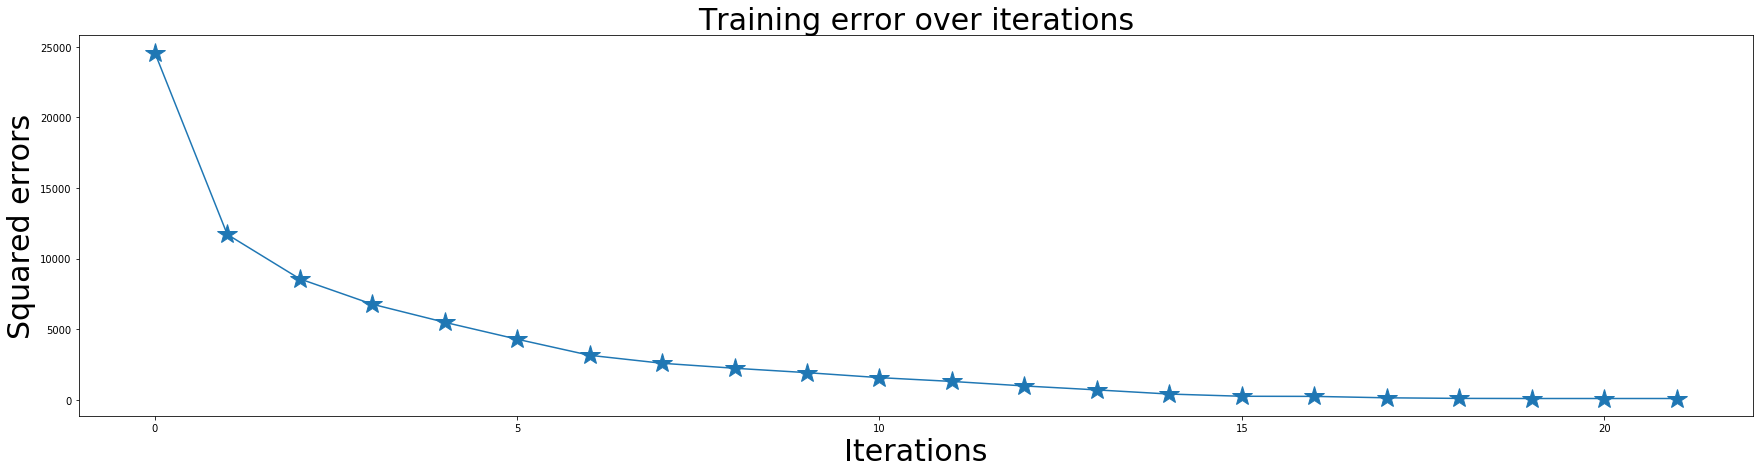

In [234]:
_ = plot_error_over_iterations(error_history)

## II. Regularization parameter 
Initially, set $\lambda=600$, and adjust it by cutting it down by a factor of 2 and run again, until we have models for 10 values of $\lambda$ in total. For each trial, set initial weights to $\mathcal{N}(0,1)$ (Normal random variables with mean 0 and variance 1).   

### P2.1
(*10 points*) Plot weights (coefficients) for the features $\texttt{agePct12t29}$, $\texttt{pctWSocSec}$, $\texttt{PctKids2Par}$, $\texttt{PctIlleg}$, and $\texttt{HousVacant}$ over $\log(\lambda)$. That is, plot the coefficient paths.   
Please plot graph according to following conditions. Otherwise, you'll get a score cut.
- fontsize : 30, markersize : 20, marker : *

In [235]:
from P02 import stack_weights_by_lambda, plot_weights

In [236]:
lambda_ = np.array([600.0 / (2 ** i) for i in range(10)])
# w_tot is a numpy array which saves all weights (after coordinate gradient descent) for 10 different lambda values
w_tot = stack_weights_by_lambda(lambda_ , X_train, y_train) # training all lambdas on single thread takes 35 minutes, with parallel (multi-threading) it takes 26s
print(w_tot.shape)

(10, 96)


In [237]:
features = ['agePct12t29', 'pctWSocSec', 'PctKids2Par', 'PctIlleg', 'HousVacant']

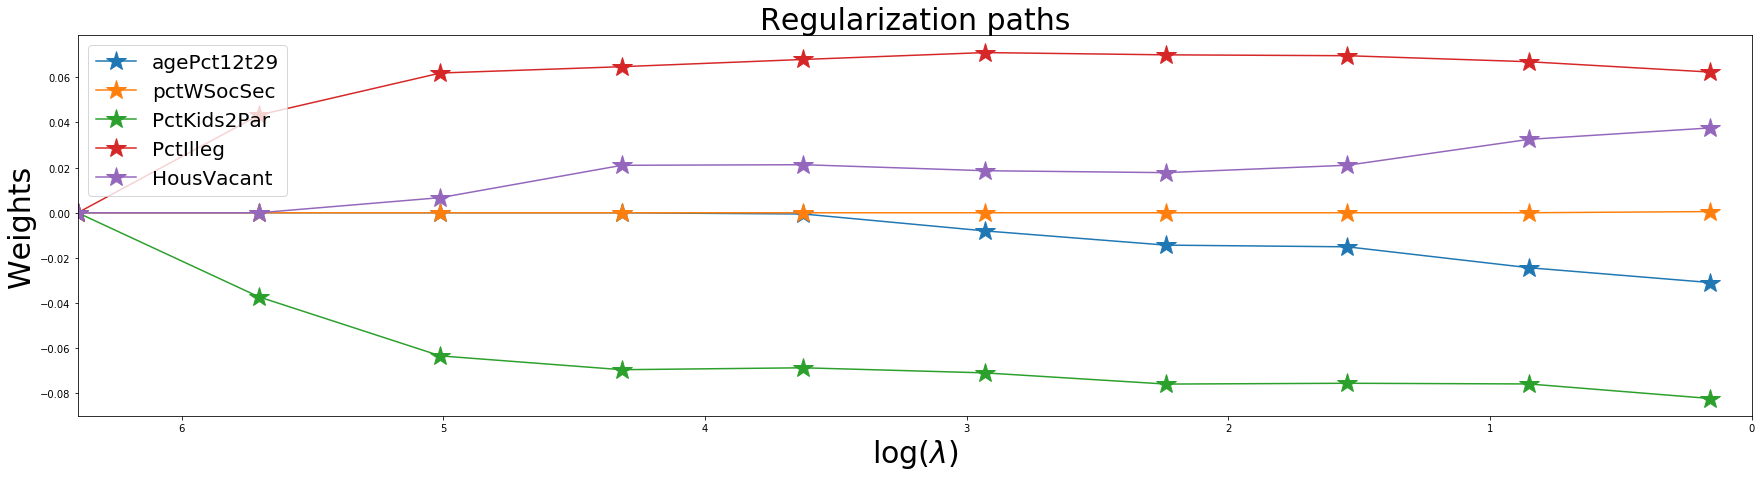

In [238]:
_ = plot_weights(lambda_, w_tot, df_train, features)

### P2.2
(*10 points*) Plot training error (sum of squared error) over $\log(\lambda)$. Please plot graph according to following conditions. Otherwise, you'll get a score cut.
- fontsize : 30, markersize : 20, marker : *(star)

In [239]:
from P02 import plot_training_error

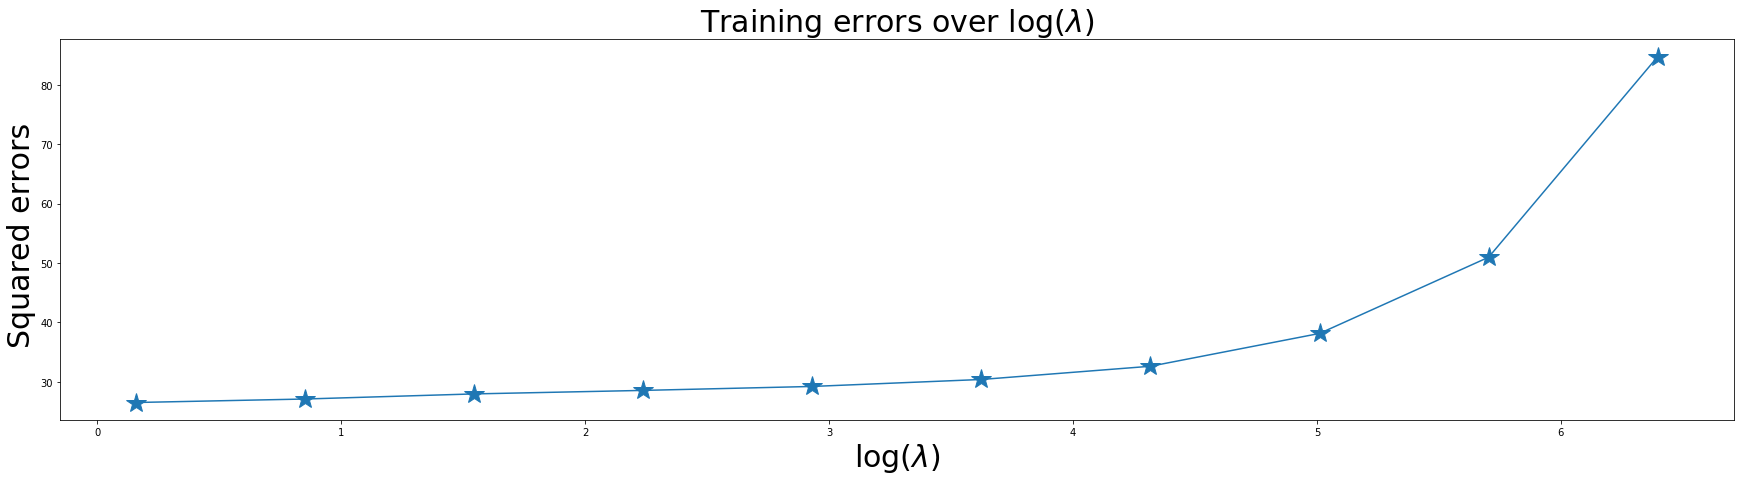

In [240]:
_ = plot_training_error(lambda_, w_tot, X_train, y_train)

### P2.3
(*10 points*) Plot test error (sum of squared error) over $\log(\lambda)$. Please plot graph according to following conditions. Otherwise, you'll get a score cut.
- fontsize : 30, markersize : 20, marker : *(star)

In [241]:
from P02 import plot_test_error

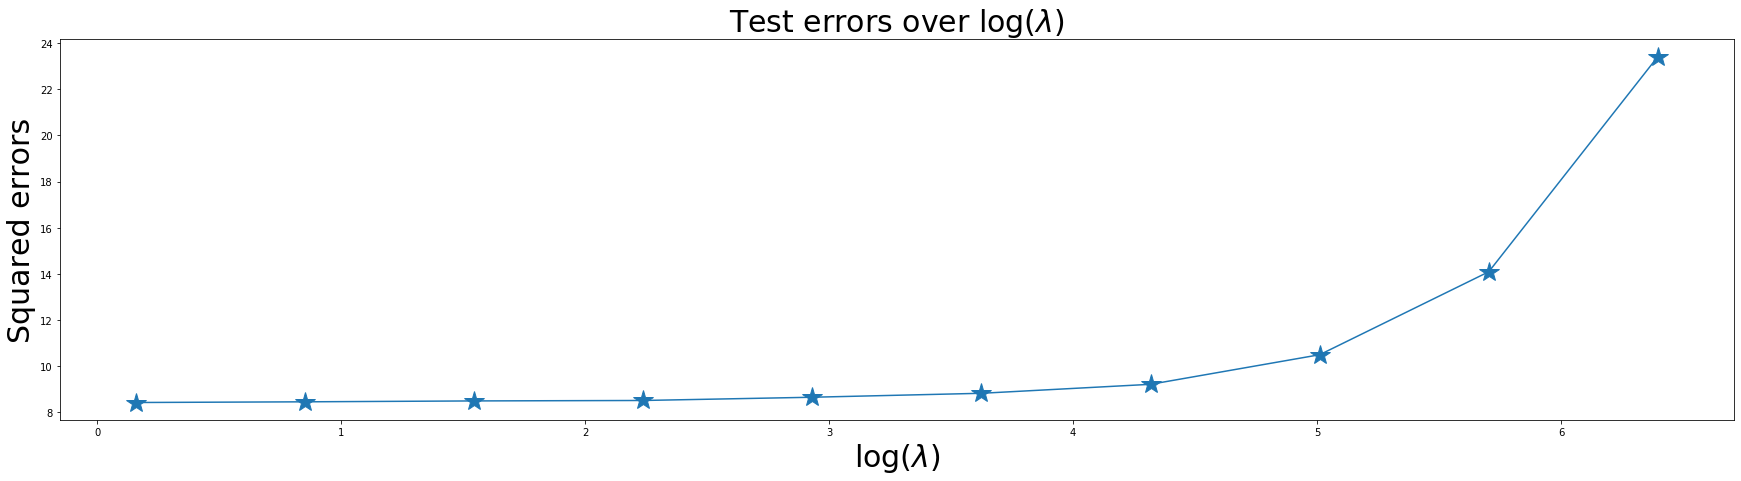

In [242]:
_ = plot_test_error(lambda_, w_tot, X_test, y_test)

### P2.4
(*10 points*) Plot number of nonzero weights over $\lambda$. Please plot graph according to following conditions. Otherwise, you'll get a score cut.
- fontsize : 30, markersize : 20, marker : *(star)

In [243]:
from P02 import plot_number_of_nonzero_index

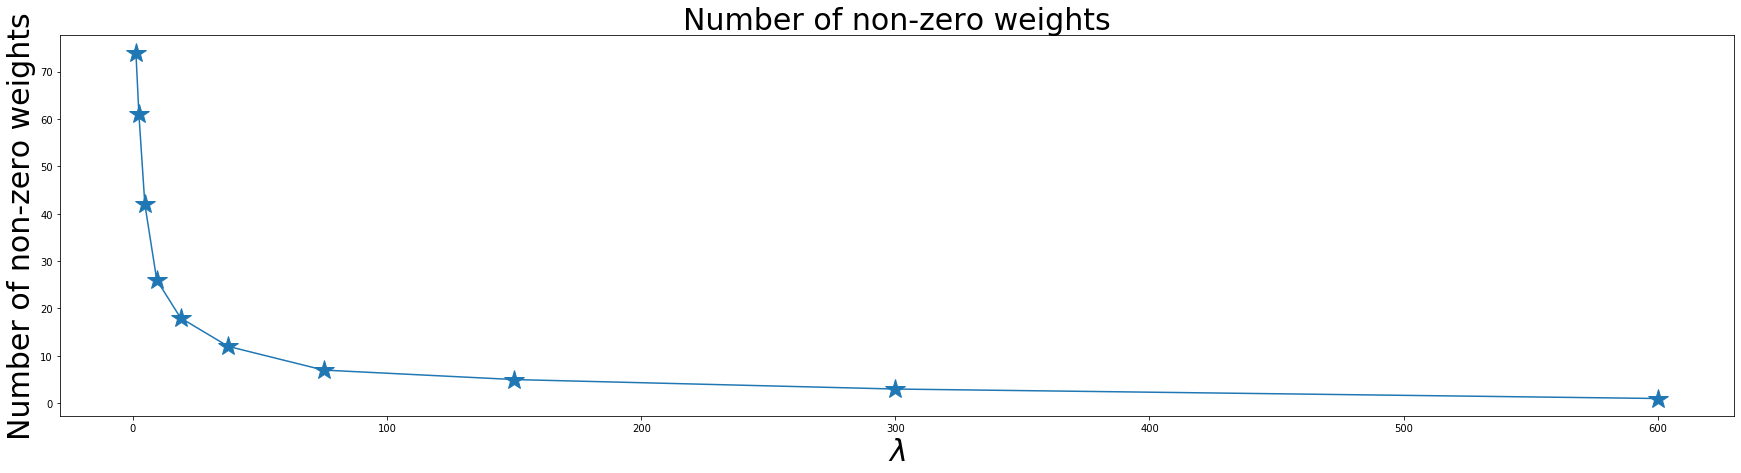

In [244]:
_ = plot_number_of_nonzero_index(lambda_, w_tot)




# Result Analysis and Discussion (20 points)



For result analysis and discussion, you can use all functions defined above. Also you can make your own functions or scripts.   
You can write **Result Analysis and Discussion** with either Korean or English.

Your answer must include the analysis and discussion about:

- Brief explanation about
    - Regularization (Ridge, Lasso), Coordinate Gradient Descent
- Result according to value of $\lambda$ 
    - Weights(values of weights, # of non-zero weights)
    - Training error
    - Test error

**Regularization (Ridge, Lasso), Coordinate Gradient Descent**

In P1.1, I implemented the LASSO regression using Co-ordinate Descent with unnormalized features. The function takes in X, the training data (with constant feature), y, the desired solution, and lambda, the regularization hyperparameter. The convergence condition is implemented after every iteration (when all w_js have been updated).

Although Ridge and Lasso regression are very similar in nature, they have 2 very significant differences. First, Ridge uses an objective function that penalizes the magnitude of coefficient with L2 norm:

\\(Ridge: RSS(w)+{\lambda { \left\| w \right\|  }_{ 2 }^{ 2 }} = \sum _{ i=1 }^{ N }{ { ({ y }_{ i }-\sum _{ j=0 }^{ D }{ { w }_{ j }{ h }_{ j }({ x }_{ i })) }  }^{ 2 } } + \lambda \sum _{ j=0 }^{ D }{{ { w }_{ j }   }^{ 2 }} \\)

while LASSO uses an objective function with L1 norm:

\\(LASSO: RSS(w)+\lambda { \left\| w \right\|  }_{ 1 } = \sum _{ i=1 }^{ N }{ { ({ y }_{ i }-\sum _{ j=0 }^{ D }{ { w }_{ j }{ h }_{ j }({ x }_{ i })) }  }^{ 2 } } + \lambda \sum _{ j=0 }^{ D }{ \left| { w }_{ j } \right|  } \\).

One of the main reason for L1 norm usage is that it leads to sparsity in the weights. With soft thresholding, features with small co-efficient would have their coefficient altered to zero. This essentially allows LASSO to filter the relevant features from all features, a very important technique to acheive dimension reduction and to select the right feature. Ridge regression, however, only reduces the co-efficient near zero but not exactly zero and hence does not possess this capability of feature selection.

Another difference is that the gradient of LASSO is non-derivable. As such, there is no closed-form solution unlike in Ridge. Consequently, gradient descent cannot be used and we use a method called sub-gradient descent, also known as co-ordinate descent. Co-ordinate descent is an optimization algorithm that assigns one co-efficient a value that minimizes the objective function when all other co-efficients are fixed. During the co-ordinate descent, we must ensure that the intercept magnitude (constant feature's weight) is not penalized. This is because the intercept does not contribute to overfitting regardless of its value. The co-ordinate descent continues from co-efficient to co-efficient until convergence is achieved (i.e. when all co-efficients have an update value of less than \\(10^{ -6} \\))

**Regularization Path**

The Regularization Paths [$log(\lambda)$ vs. Weights] illustrates the co-efficients of 5 different features (i.e. agePct12t29, pctWSocSec, PctKids2Par, PctIlleg, and HousVacant) over a changing $\lambda\$ value.

The description of these features can be found here: http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names 

**agePct12t29**: percentage of population that is 12-29 in age<br>**pctWSocSec**: percentage of households with social security income in 1989<br>**PctKids2Par**: percentage of kids in family housing with two parents<br>**PctIlleg**: percentage of kids born to parents who were never married<br>**HousVacant**: number of vacant households<br> 

From the graph, we can observe that the co-efficients converge to 0 as the value of $\lambda\$ increases. This tallies with the characteristics of LASSO regression; it leads to sparsity. 
The higher the lambda is, the stronger the regularization is applied, and the sparser (more zero-coefficient) the model is, as can be seen from the 'Number of non-zero weights' graph.

Features whose co-efficient converges to zero only at large lamdas are deemed to be more significant and influential in the prediction. Hence, **we identify from the graph that 'PctIlleg', 'HouseVacant' and 'PctKids2Par' are more influential in determining the crime rate than the other 2 features, 'agePct12t29' and 'pctWSocSec'.** These 2 features are less influential since they converge even at relatively small value of lambdas.

Also, it is to be observed that a negative co-efficient (e.g. ${ w }_{ j } = -1$) implies that its corresponding feature (${x}_{j}$) decreases the value of our prediction (${y}_{i}$), since $${y}_{i} = \sum _{ j=0 }^{ D }{ { w }_{ j }{ h }_{ j }({ x }_{ i })) } $$
and all features are positive. The reverse holds true as well; a positive co-efficient makes the feature increase the predicted value. Hence, **we identify from the graph that 'PctIlleg' and 'HouseVacant' contribute to the increase of predicted crime rate while 'PctKids2Par' (and 'agePct12t29', albeit insignificantly) contributes to the decrease of it.** 

Combining the facts from the above 2 paragraphs, **we come to a conclusion that:**<br> 

(1) **Percentage of kids with unmarried parents (PctIlleg) is highly and positively correlated to violent crime rate.** There could be many reasons as to why, and one of which is that these kids tend to not get much emotional and financial support from their parents, since the parents are unlikely to be living together. They may not feel 'loved' and is constantly stressed from the broken family. They may tend to mix around and grow up with bad guys, especially since their parents may not guide them towards the 'right path' of life. All these factors encourage them to commit violent crimes. Of course, these deductions are purely hypothetical. <br>
(2) **Number of vacant household (HousVacant) is positively correlated to violent crime rate.** This may be because vacant houses encourage crimes such as theft and vandalism. Also, vacant houses reflect the sparsity of the neighbourhood's population (few people living in an area), which means less patrol and enforcement by the police, as well as a low likelihood of anybody witnessing a crime. These are significant factors that encourage violent crime.<br>
(3) **Percentage of kids living together with both parents (PctKids2Par) is highly and negatively correlated to violent crime rate.** This is somewhat the opposite of conclusion 1. Kids living together with their parents are subjected to their parents' love and support. They have parents to impart ethical and moral values to, as well as to help them stay on the 'right path' of life.<br>
(4) **Percentage of population that is between 12 to 29 years old (agePct12t29) is weakly and negatively correlated to violent crime rate.** This suggests that a younger population is less likely to commit violent crimes, as research has found.<br>
(5) **Percentage of households with social security income in 1989 (pctWSocSec) has (almost) zero correlation with violent crime rate.** Contrary to popular belief that financial support from the government will reduce crime rate (less need for money, hence less likely to commit robbery etc.), it actually is not.

This data **ultimately reveals that living together harmonously with one's family is crucial in minimizing violent crimes.**


